In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression, LogisticRegression

# Bitcoin and Stock Market Correlation

## 1. Introduction

Traders analyze the movements of financial instruments to gauge market sentiment and predict trends, operating under the belief that certain assets are correlated. Understanding the correlation between two assets provides valuable insights.

Both Bitcoin and stocks are speculative assets, often traded based on price speculation rather than intrinsic value. This similarity implies that stock movements may reflect the market's risk appetite, potentially allowing predictions about Bitcoin's behavior. Investors willing to take on more risk may invest in these speculative assets.

This analysis evaluates the correlation between stocks and Bitcoin, examining their historical interactions. The goal is to determine whether stock market movements can predict Bitcoin's price behavior.

### 1.1. What is Bitcoin?

**Bitcoin** is a decentralized digital currency that you can buy, sell and exchange directly, without an intermediary like a bank. Bitcoin’s creator, Satoshi Nakamoto, originally described the need for “an electronic payment system based on cryptographic proof instead of trust.”

Every Bitcoin transaction that’s ever been made exists on a public ledger accessible to everyone, making transactions hard to reverse and difficult to fake. That’s by design: Core to their decentralized nature, Bitcoins aren’t backed by the government or any issuing institution, and there’s nothing to guarantee their value besides the proof baked in the heart of the system [2].

### 1.2. What Is the S&P 500 Index?

The **S&P 500 Index** or **Standard & Poor's 500 Index** is a market-capitalization-weighted index of 500 leading publicly traded companies in the U.S. The index includes 503 components because three have two share classes listed.

It's not an exact list of the top 500 U.S. companies by market cap because the index includes other criteria. The S&P 500 index is nonetheless regarded as one of the best gauges of prominent American equities performance and the stock market overall [3].

## 2. Methodology and Research Design

This study uses a quantitative research design to analyze the relationship between **Bitcoin** prices and the **stock market** over the **past five years** with the **S&P 500 Index** serving as a proxy for the stock market.

**TODO: maybe a little bit more about the Methodology and Research Design**

## 3. Data Acquisition

Data were collected from the following sources:

- Bitcoin Prices: Bitcoin's daily closing prices were obtained from [finance.yahoo.com](https://finance.yahoo.com/quote/BTC-USD/history/).
- S&P 500 Index: Daily index values were obtained from [finance.yahoo.com](https://finance.yahoo.com/quote/%5EGSPC/history/).

The study period spans **five years**, from August 2019 to August 2024.

## 4. Data Processing

## 4.1. Read Data

### 4.1.1. Read Bitcoin price movement data for the last 5 years

In [2]:
btc_price_data = pd.read_csv("data/btc_usd/BTC-USD-5-Years.csv")
btc_price_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-26,10126.299805,10512.328125,10126.299805,10370.820313,10370.820313,18438654080
1,2019-08-27,10372.826172,10381.328125,10087.300781,10185.500000,10185.500000,14762609503
2,2019-08-28,10203.426758,10279.366211,9716.656250,9754.422852,9754.422852,17603790323
3,2019-08-29,9756.786133,9756.786133,9421.629883,9510.200195,9510.200195,17045878501
4,2019-08-30,9514.844727,9656.124023,9428.302734,9598.173828,9598.173828,13595263986
...,...,...,...,...,...,...,...
1820,2024-08-19,58480.710938,59612.660156,57864.710938,59493.453125,59493.453125,25911207712
1821,2024-08-20,59493.453125,61396.328125,58610.882813,59012.792969,59012.792969,31613400008
1822,2024-08-21,59014.988281,61834.351563,58823.445313,61175.191406,61175.191406,32731154072
1823,2024-08-22,61168.316406,61408.109375,59815.253906,60381.914063,60381.914063,27625734377


In [3]:
btc_price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1825.0,3.146285e+04,1.847850e+04,5.002578e+03,1.644179e+04,2.862262e+04,4.419298e+04,7.307938e+04
High,1825.0,3.216063e+04,1.891376e+04,5.331834e+03,1.663819e+04,2.916082e+04,4.550324e+04,7.375007e+04
Low,1825.0,3.072027e+04,1.799283e+04,4.106981e+03,1.617050e+04,2.817799e+04,4.332002e+04,7.133409e+04
Close,1825.0,3.149023e+04,1.848509e+04,4.970788e+03,1.644498e+04,2.868054e+04,4.431822e+04,7.308350e+04
Adj Close,1825.0,3.149023e+04,1.848509e+04,4.970788e+03,1.644498e+04,2.868054e+04,4.431822e+04,7.308350e+04
Volume,1825.0,3.117074e+10,1.792905e+10,5.331173e+09,1.931360e+10,2.784951e+10,3.831860e+10,3.509679e+11


In [4]:
btc_price_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
btc_price_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 4.1.2. Read S&P 500 price movement data for the last 5 years

In [6]:
sp_500_price_data = pd.read_csv("data/S_and_P_500-5-Years.csv")
sp_500_price_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-26,2866.699951,2879.270020,2856.000000,2878.379883,2878.379883,2859790000
1,2019-08-27,2893.139893,2898.790039,2860.590088,2869.159912,2869.159912,3537490000
2,2019-08-28,2861.280029,2890.030029,2853.050049,2887.939941,2887.939941,3102480000
3,2019-08-29,2910.370117,2930.500000,2905.669922,2924.580078,2924.580078,3177150000
4,2019-08-30,2937.090088,2940.429932,2913.320068,2926.459961,2926.459961,3009910000
...,...,...,...,...,...,...,...
1253,2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000
1254,2024-08-20,5602.879883,5620.509766,5585.500000,5597.120117,5597.120117,2994420000
1255,2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000
1256,2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000


In [7]:
sp_500_price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,4.062243e+03,6.916520e+02,2.290710e+03,3.591753e+03,4.126600e+03,4.488822e+03,5.644090e+03
High,1258.0,4.086389e+03,6.912662e+02,2.300730e+03,3.624460e+03,4.148055e+03,4.511990e+03,5.669670e+03
Low,1258.0,4.036896e+03,6.927430e+02,2.191860e+03,3.567610e+03,4.098855e+03,4.462755e+03,5.639020e+03
Close,1258.0,4.063164e+03,6.919554e+02,2.237400e+03,3.583590e+03,4.126245e+03,4.486402e+03,5.667200e+03
Adj Close,1258.0,4.063164e+03,6.919554e+02,2.237400e+03,3.583590e+03,4.126245e+03,4.486402e+03,5.667200e+03
Volume,1258.0,4.350750e+09,1.051686e+09,1.296530e+09,3.724205e+09,4.082780e+09,4.705292e+09,9.976520e+09


In [8]:
sp_500_price_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
sp_500_price_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 4.2. Exploratory Data Analysis

### 4.2.1. Data Tidying and Cleaning

For further processing, we only need the **date** and the **closing price** on that day from the two data sets.

Create new Dataframe only with **Date** and **Close** columns from the **btc_price_data**:

In [10]:
btc_closing_price_data = btc_price_data[["Date", "Close"]].copy(deep=True)
btc_closing_price_data

,Date,Close
0,2019-08-26,10370.820313
1,2019-08-27,10185.500000
2,2019-08-28,9754.422852
3,2019-08-29,9510.200195
4,2019-08-30,9598.173828
...,...,...
1820,2024-08-19,59493.453125
1821,2024-08-20,59012.792969
1822,2024-08-21,61175.191406
1823,2024-08-22,60381.914063


Convert the `Date` column from *object* type to *datetime64* type.

In [11]:
btc_closing_price_data.Date = pd.to_datetime(btc_closing_price_data.Date)
btc_closing_price_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

Create new Dataframe only with **Date** and **Close** columns from the **sp_500_price_data**.

In [12]:
sp_500_closing_price_data = sp_500_price_data[["Date", "Close"]].copy(deep=True)
sp_500_closing_price_data

,Date,Close
0,2019-08-26,2878.379883
1,2019-08-27,2869.159912
2,2019-08-28,2887.939941
3,2019-08-29,2924.580078
4,2019-08-30,2926.459961
...,...,...
1253,2024-08-19,5608.250000
1254,2024-08-20,5597.120117
1255,2024-08-21,5620.850098
1256,2024-08-22,5570.640137


Convert the `Date` column from *object* type to *datetime64* type.

In [13]:
sp_500_closing_price_data.Date = pd.to_datetime(sp_500_closing_price_data.Date)
sp_500_closing_price_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

#### Normalize Prices

To compare price movements directly, it's useful to normalize the prices to a common starting point (e.g., setting both prices to 100 at the start of the period).
This makes it easier to see how each asset has moved in **percentage** terms relative to its starting value.

Values above 100 indicate the percentage increase in price since the beginning. For example, a value of 115 means the price has increased 15% since the base date, while a value of 82 would indicate a decline of 18% since the base date.

$$\text{Normalized Price} = \frac{\text{Current Price}}{\text{Starting Price}} \times 100 \ \left[\% \right]$$

In [14]:
def compute_normalized_price(current_price, starting_price):
    return (current_price / starting_price) * 100

Compute **normalized price** for the **BTC closing price**.

In [15]:
# Get the 'starting_price'
btc_starting_price = btc_closing_price_data.Close.loc[0]
# Compute 'normalized_price'
btc_closing_price_data["Normalized_Price"] = btc_closing_price_data.Close.apply(lambda current_price: compute_normalized_price(current_price, btc_starting_price))
btc_closing_price_data

,Date,Close,Normalized_Price
0,2019-08-26,10370.820313,100.000000
1,2019-08-27,10185.500000,98.213060
2,2019-08-28,9754.422852,94.056425
3,2019-08-29,9510.200195,91.701523
4,2019-08-30,9598.173828,92.549804
...,...,...,...
1820,2024-08-19,59493.453125,573.661980
1821,2024-08-20,59012.792969,569.027244
1822,2024-08-21,61175.191406,589.878038
1823,2024-08-22,60381.914063,582.228910


Compute **normalized price** for the **S&P 500 closing price**.

In [16]:
# Get the 'starting_price'
sp_500_starting_price = sp_500_closing_price_data.Close.loc[0]
# Compute 'normalized_price'
sp_500_closing_price_data["Normalized_Price"] = sp_500_closing_price_data.Close.apply(lambda current_price: compute_normalized_price(current_price, sp_500_starting_price))
sp_500_closing_price_data

,Date,Close,Normalized_Price
0,2019-08-26,2878.379883,100.000000
1,2019-08-27,2869.159912,99.679682
2,2019-08-28,2887.939941,100.332133
3,2019-08-29,2924.580078,101.605076
4,2019-08-30,2926.459961,101.670387
...,...,...,...
1253,2024-08-19,5608.250000,194.840508
1254,2024-08-20,5597.120117,194.453837
1255,2024-08-21,5620.850098,195.278258
1256,2024-08-22,5570.640137,193.533875


#### Calculate Returns
**Daily Returns**: Calculate the daily return for each asset in **percent**.

$$\text{Daily Return} = \frac{\text{Price on Day 2} - \text{Price on Day 1}}{\text{Price on Day 1}} \times 100 \ \left[\% \right]$$

In [17]:
def calculate_daily_return(prices_arr):
    """
     Calculate the daily return from the values in the 'prices_arr'
    """
    daily_return_prices = []
    price_day_1 = prices_arr[0]

    for price in prices_arr:
        price_day_2 = price

        # Calculate return 
        return_price = ((price_day_2 - price_day_1) / price_day_1) * 100
        daily_return_prices.append(return_price)
        
        price_day_1 = price_day_2
        
    return daily_return_prices

Calculate **BTC** daily returns:

In [18]:
btc_closing_price_data["BTC_Return"] = calculate_daily_return(btc_closing_price_data.Close)
btc_closing_price_data

,Date,Close,Normalized_Price,BTC_Return
0,2019-08-26,10370.820313,100.000000,0.000000
1,2019-08-27,10185.500000,98.213060,-1.786940
2,2019-08-28,9754.422852,94.056425,-4.232263
3,2019-08-29,9510.200195,91.701523,-2.503712
4,2019-08-30,9598.173828,92.549804,0.925045
...,...,...,...,...
1820,2024-08-19,59493.453125,573.661980,1.726094
1821,2024-08-20,59012.792969,569.027244,-0.807921
1822,2024-08-21,61175.191406,589.878038,3.664288
1823,2024-08-22,60381.914063,582.228910,-1.296730


Calculate **S&P 500** daily returns:

In [19]:
sp_500_closing_price_data["SP_500_Return"] = calculate_daily_return(sp_500_closing_price_data.Close)
sp_500_closing_price_data

,Date,Close,Normalized_Price,SP_500_Return
0,2019-08-26,2878.379883,100.000000,0.000000
1,2019-08-27,2869.159912,99.679682,-0.320318
2,2019-08-28,2887.939941,100.332133,0.654548
3,2019-08-29,2924.580078,101.605076,1.268729
4,2019-08-30,2926.459961,101.670387,0.064279
...,...,...,...,...
1253,2024-08-19,5608.250000,194.840508,0.972228
1254,2024-08-20,5597.120117,194.453837,-0.198456
1255,2024-08-21,5620.850098,195.278258,0.423968
1256,2024-08-22,5570.640137,193.533875,-0.893281


### 4.2.2. Merge datasets

Merge the two DataFrames with a **left join** on the `Date` column. We want to obtain all `Date` values from the `btc_closing_price_data` DataFrame. All missing values in the `sp_500_closing_price_data` DataFrame are filled with a **NaN**.

In [20]:
data_merged = btc_closing_price_data.merge(sp_500_closing_price_data, on = "Date", how = "left", suffixes = ("_BTC", "_SP_500"))
data_merged.head(10)

,Date,Close_BTC,Normalized_Price_BTC,BTC_Return,Close_SP_500,Normalized_Price_SP_500,SP_500_Return
0,2019-08-26,10370.820313,100.000000,0.000000,2878.379883,100.000000,0.000000
1,2019-08-27,10185.500000,98.213060,-1.786940,2869.159912,99.679682,-0.320318
2,2019-08-28,9754.422852,94.056425,-4.232263,2887.939941,100.332133,0.654548
3,2019-08-29,9510.200195,91.701523,-2.503712,2924.580078,101.605076,1.268729
4,2019-08-30,9598.173828,92.549804,0.925045,2926.459961,101.670387,0.064279
5,2019-08-31,9630.664063,92.863089,0.338504,NaN,NaN,NaN
6,2019-09-01,9757.970703,94.090635,1.321888,NaN,NaN,NaN
7,2019-09-02,10346.760742,99.768007,6.033939,NaN,NaN,NaN
8,2019-09-03,10623.540039,102.436834,2.675033,2906.270020,100.968953,-0.689910
9,2019-09-04,10594.493164,102.156752,-0.273420,2937.780029,102.063666,1.084208


In [21]:
data_merged.dtypes

Date                       datetime64[ns]
Close_BTC                         float64
Normalized_Price_BTC              float64
BTC_Return                        float64
Close_SP_500                      float64
Normalized_Price_SP_500           float64
SP_500_Return                     float64
dtype: object

#### Fill missing values (Imputation) 

Since Bitcoin closing prices are available daily, but S&P 500 Index don't trade on weekends and holidays, the S&P 500 Index values were aligned with Bitcoin prices by **forward filling** the missing dates with the last available trading day value preceding the date.

In [22]:
data_merged["Close_BTC_Filled"] = data_merged.Close_BTC.ffill()
data_merged["Close_SP_500_Filled"] = data_merged.Close_SP_500.ffill()
data_merged["Normalized_Price_SP_500"] = data_merged.Normalized_Price_SP_500.ffill()

The missing `SP_500_Return` values are filled with 0 (**Zeroes**).

In [23]:
data_merged["SP_500_Return"] = data_merged.SP_500_Return.fillna(0)

Reorder the columns in the DataFrame:

In [24]:
data_merged.columns

Index(['Date', 'Close_BTC', 'Normalized_Price_BTC', 'BTC_Return',
       'Close_SP_500', 'Normalized_Price_SP_500', 'SP_500_Return',
       'Close_BTC_Filled', 'Close_SP_500_Filled'],
      dtype='object')

In [25]:
data_tidy = data_merged[["Date", "Close_BTC", "Close_BTC_Filled",
                        "Close_SP_500", "Close_SP_500_Filled", 
                        "BTC_Return", "SP_500_Return",
                        "Normalized_Price_BTC", "Normalized_Price_SP_500"]].copy(deep=True)

data_tidy.head(10)

,Date,Close_BTC,Close_BTC_Filled,Close_SP_500,Close_SP_500_Filled,BTC_Return,SP_500_Return,Normalized_Price_BTC,Normalized_Price_SP_500
0,2019-08-26,10370.820313,10370.820313,2878.379883,2878.379883,0.000000,0.000000,100.000000,100.000000
1,2019-08-27,10185.500000,10185.500000,2869.159912,2869.159912,-1.786940,-0.320318,98.213060,99.679682
2,2019-08-28,9754.422852,9754.422852,2887.939941,2887.939941,-4.232263,0.654548,94.056425,100.332133
3,2019-08-29,9510.200195,9510.200195,2924.580078,2924.580078,-2.503712,1.268729,91.701523,101.605076
4,2019-08-30,9598.173828,9598.173828,2926.459961,2926.459961,0.925045,0.064279,92.549804,101.670387
5,2019-08-31,9630.664063,9630.664063,NaN,2926.459961,0.338504,0.000000,92.863089,101.670387
6,2019-09-01,9757.970703,9757.970703,NaN,2926.459961,1.321888,0.000000,94.090635,101.670387
7,2019-09-02,10346.760742,10346.760742,NaN,2926.459961,6.033939,0.000000,99.768007,101.670387
8,2019-09-03,10623.540039,10623.540039,2906.270020,2906.270020,2.675033,-0.689910,102.436834,100.968953
9,2019-09-04,10594.493164,10594.493164,2937.780029,2937.780029,-0.273420,1.084208,102.156752,102.063666


In [26]:
data_tidy.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1825,2022-02-23 00:00:00,2019-08-26 00:00:00,2020-11-24 00:00:00,2022-02-23 00:00:00,2023-05-25 00:00:00,2024-08-23 00:00:00,NaN
Close_BTC,1825.0,31490.233934,4970.788086,16444.982422,28680.537109,44318.222656,73083.5,18485.086175
Close_BTC_Filled,1825.0,31490.233934,4970.788086,16444.982422,28680.537109,44318.222656,73083.5,18485.086175
Close_SP_500,1258.0,4063.164056,2237.399902,3583.590027,4126.245117,4486.402466,5667.200195,691.955416
Close_SP_500_Filled,1825.0,4064.071231,2237.399902,3585.149902,4127.830078,4483.870117,5667.200195,690.171186
BTC_Return,1825.0,0.157942,-37.169539,-1.349796,0.018878,1.601855,18.746474,3.378393
SP_500_Return,1825.0,0.043,-11.984055,-0.191372,0.0,0.37108,9.382774,1.109802
Normalized_Price_BTC,1825.0,303.642653,47.93052,158.569736,276.550323,427.335749,704.703175,178.241312
Normalized_Price_SP_500,1825.0,141.193011,77.731224,124.554439,143.408106,155.777566,196.888542,23.977766


In [27]:
data_tidy.dtypes

Date                       datetime64[ns]
Close_BTC                         float64
Close_BTC_Filled                  float64
Close_SP_500                      float64
Close_SP_500_Filled               float64
BTC_Return                        float64
SP_500_Return                     float64
Normalized_Price_BTC              float64
Normalized_Price_SP_500           float64
dtype: object

## 5. Visualize the Data

In [28]:
def plot_market_data(dates, prices, labels, title):
    plt.figure(figsize=(14, 7))
    
    ax = plt.gca()
    ax.set_facecolor('gainsboro')
    ax.xaxis.grid(True, color='white')
    ax.yaxis.grid(True, color='white')

    x_lim_start = dates[0]
    x_lim_end = dates[len(dates) - 1]
    # plt.xlim(x_lim_start, x_lim_end)
    ax.set_xlim(xmin=x_lim_start,xmax=x_lim_end)
    
    plt.plot(dates, prices)
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

    plt.title(title)
    plt.show()

In [29]:
def plot_multiple_market_data(dates, labels, legend, prices, title):
    plt.figure(figsize=(14, 7))
    
    ax = plt.gca()
    ax.set_facecolor('gainsboro') 
    ax.xaxis.grid(True, color='white')
    ax.yaxis.grid(True, color='white')

    x_lim_start = dates[0]
    x_lim_end = dates[len(dates) - 1]
    # plt.xlim(x_lim_start, x_lim_end)
    ax.set_xlim(xmin=x_lim_start,xmax=x_lim_end)
    
    plt.plot(dates, prices[0], label=legend[0])
    plt.plot(dates, prices[1], label=legend[1])
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

    plt.legend()
    
    plt.title(title)
    plt.show()

In [30]:
def plot_corr_scatter(first_var, labels_extrema_first_var, second_var, labels_extrema_second_var, labels, title, corr_coeff):
    plt.figure(figsize=(14, 7))
    
    ax = plt.gca()
    ax.set_facecolor('gainsboro')
    ax.xaxis.grid(True, color='white')
    ax.yaxis.grid(True, color='white')

    plt.scatter(first_var, second_var)

    # Plot Correlation Coefficient
    sns.regplot(x=first_var, y=second_var, line_kws=dict(color="y", label=f"Correllation Coeff (r): {corr_coeff:.2f}"))

    # Get max value for first_var
    plt.scatter(first_var.max(), second_var[first_var.idxmax()], marker="x", color = "orange")
    # Annotate the max value for first_var
    plt.annotate(labels_extrema_first_var[0], (first_var.max() + 0.5, second_var[first_var.idxmax()] + 0.5))
    # Get min value for first_var
    plt.scatter(first_var.min(), second_var[first_var.idxmin()], marker="x", color = "orange")
    # Annotate the min value for first_var
    plt.annotate(labels_extrema_first_var[1], (first_var.min() + 0.5, second_var[first_var.idxmin()]  + 0.5))

    # Get max value for second_var
    plt.scatter(first_var[second_var.idxmax()], second_var.max(), marker="x", color = "red")
    # Annotate the max value for second_var
    plt.annotate(labels_extrema_second_var[0], (first_var[second_var.idxmax()] + 0.5, second_var.max() + 0.5))
    # Get min value for second_var
    plt.scatter(first_var[second_var.idxmin()], second_var.min(), marker="x", color = "red")
    # Annotate the min value for second_var
    plt.annotate(labels_extrema_second_var[1], (first_var[second_var.idxmin()] + 0.5, second_var.min() + 0.5))
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

    plt.legend()

    plt.title(title)
    plt.show()

#### 5.1. Bitcoin Price

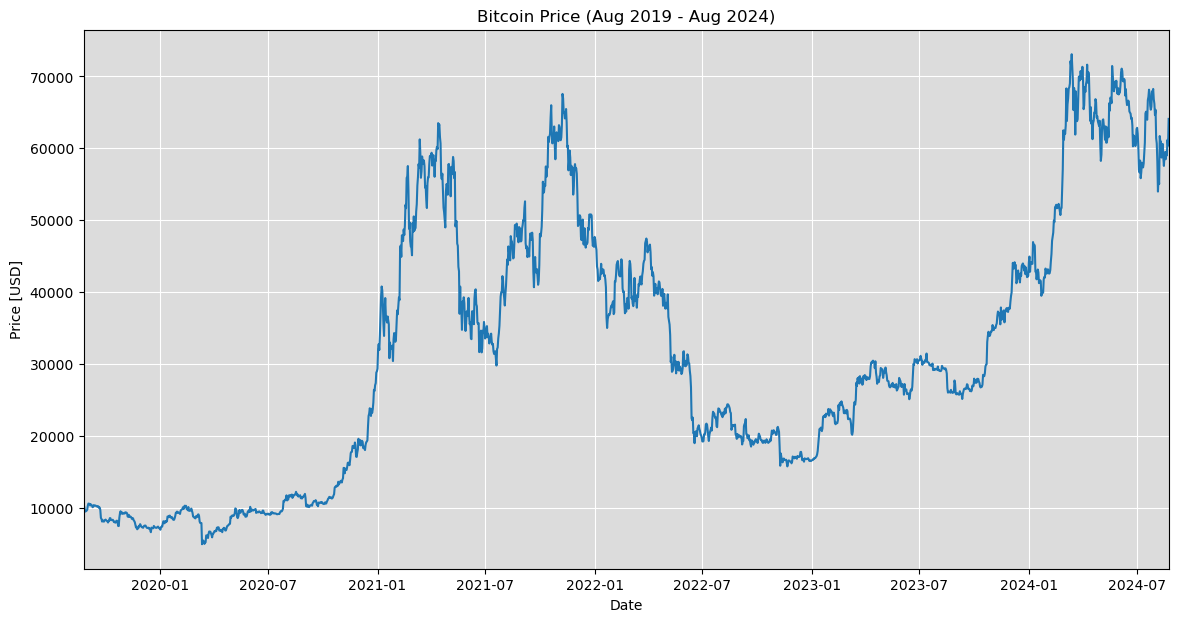

In [31]:
dates = data_tidy.Date
prices_normalized_btc = data_tidy.Close_BTC
title_btc = 'Bitcoin Price (Aug 2019 - Aug 2024)'

labels = ['Date', 'Price [USD]']

plot_market_data(dates, prices_normalized_btc, labels, title_btc)

#### 5.2. S&P_500 Price

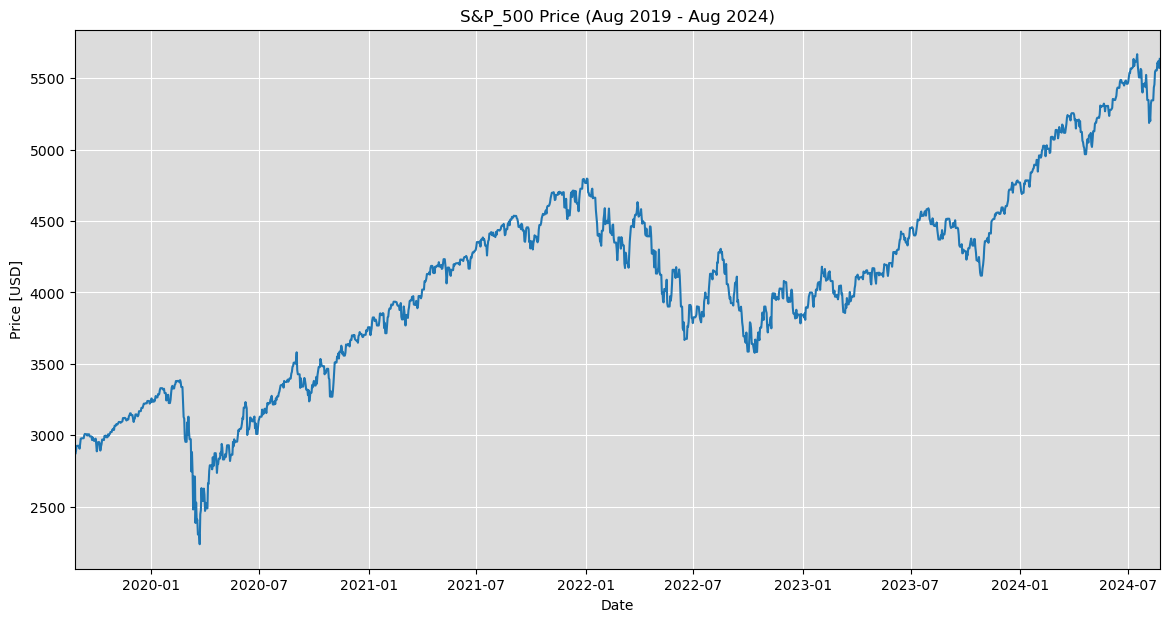

In [32]:
dates_sp_500 = data_tidy.Date
prices_normalized_sp_500  = data_tidy.Close_SP_500_Filled
title = 'S&P_500 Price (Aug 2019 - Aug 2024)'

labels = ['Date', 'Price [USD]']

plot_market_data(dates_sp_500, prices_normalized_sp_500, labels, title)

#### 5.3. Normalized Prices

Plot the **normalized prices** over time on the same chart to visually compare their movements.

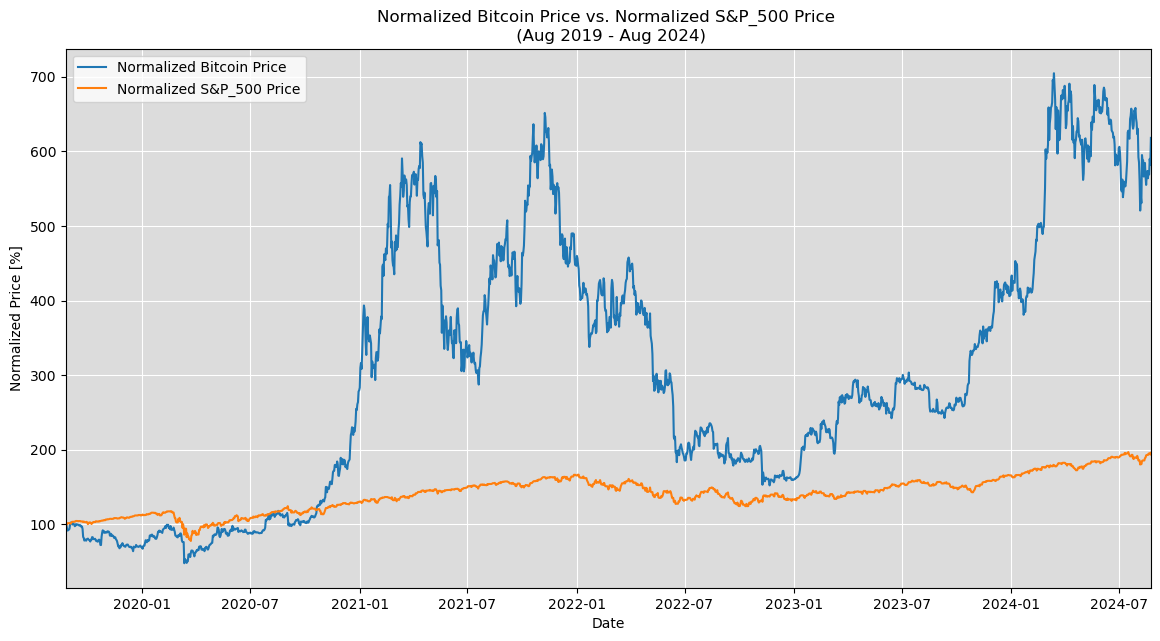

In [33]:
dates = data_tidy.Date
prices_normalized_btc = data_tidy.Normalized_Price_BTC
prices_normalized_sp_500  = data_tidy.Normalized_Price_SP_500
title_btc = "Normalized Bitcoin Price vs. Normalized S&P_500 Price \n (Aug 2019 - Aug 2024)"

labels = ["Date", "Normalized Price [%]"]
legend = ["Normalized Bitcoin Price", "Normalized S&P_500 Price"]
prices = [prices_normalized_btc, prices_normalized_sp_500]

plot_multiple_market_data(dates, labels, legend, prices, title_btc)

#### 5.4. Daily Returns

Plot the **daily returns** over time on the same chart to visually compare their movements.

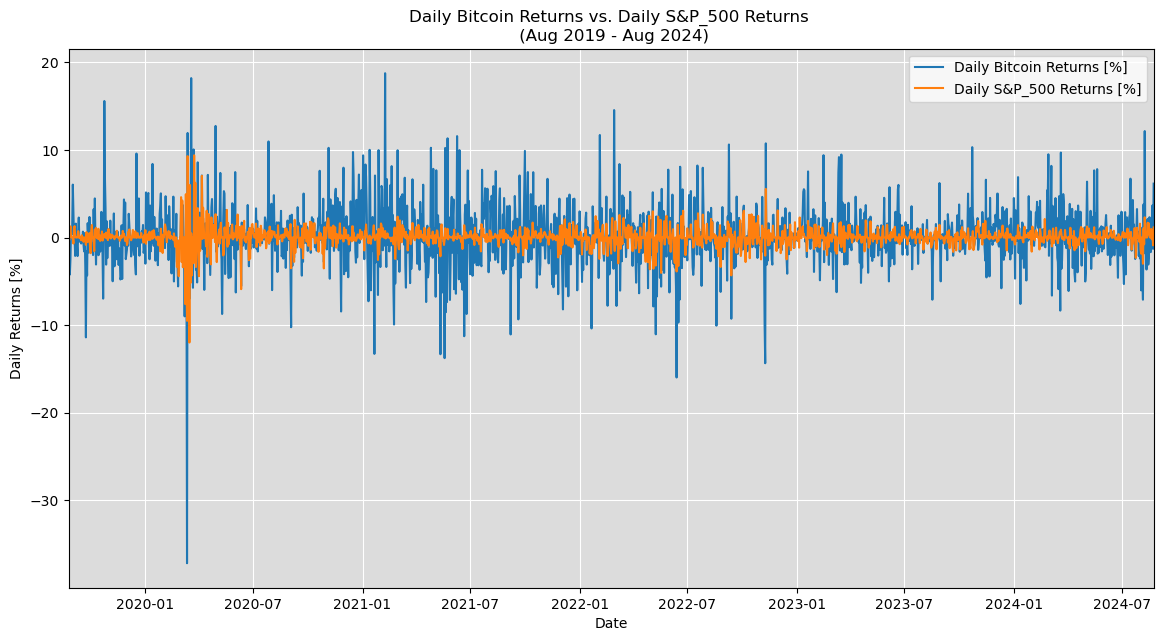

In [34]:
dates = data_tidy.Date
btc_returns = data_tidy.BTC_Return
sp_500_returns  = data_tidy.SP_500_Return
title_btc = "Daily Bitcoin Returns vs. Daily S&P_500 Returns \n (Aug 2019 - Aug 2024)"

returns = [btc_returns, sp_500_returns]
labels = ["Date", "Daily Returns [%]"]
legend = ["Daily Bitcoin Returns [%]", "Daily S&P_500 Returns [%]"]

plot_multiple_market_data(dates, labels, legend, returns, title_btc)

## 6. Statistical Analysis
   - **Correlation**: Calculate the Pearson correlation coefficient between the daily returns of the S&P 500 and Bitcoin. This will give you a measure of the linear relationship between the two assets. A correlation close to 1 means they move together, while a correlation close to -1 means they move in opposite directions.
   - **Volatility Comparison**: Analyze and compare the volatility (standard deviation of returns) of both assets to understand their risk levels.
   - **Beta**: Calculate Bitcoin's beta with respect to the S&P 500 to see how sensitive Bitcoin is to movements in the S&P 500.

### 6.1. Correlation between the daily returns of the S&P 500 and Bitcoin

**Correlation** is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.  In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship [7].

#### 6.1.1. Pearson correlation

Calculation of the **Pearson correlation coefficient** between the **daily returns** of the *S&P_500* and *Bitcoin*. This will give us a measure of the **linear relationship** between the two assets. A correlation close to 1 means they move together, while a correlation close to -1 means they move in opposite directions.

##### 1. Calculattion of the Pearson Correlation

In [35]:
correlation_columns = ["BTC_Return", "SP_500_Return"]
corr_dataframe = data_tidy[correlation_columns].corr("pearson")
corr_dataframe

,BTC_Return,SP_500_Return
BTC_Return,1.000000,0.338641
SP_500_Return,0.338641,1.000000


Get the current *Pearson* correlation coefficient between *BTC_Return* and *SP_500_Return*

In [36]:
btc_sp_500_returns_corr_coeff = corr_dataframe["BTC_Return"].iloc[1]
btc_sp_500_returns_corr_coeff

0.33864058759406873

Create a heatmap with the Pearson correlation

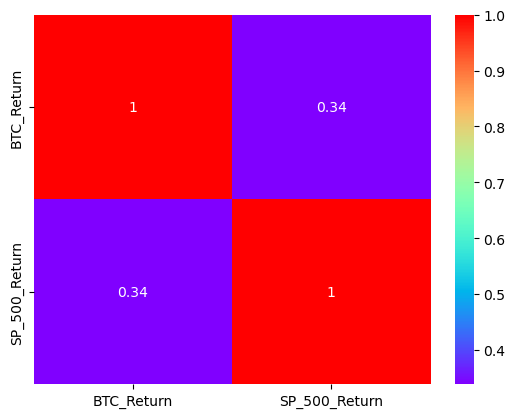

In [37]:
sns.heatmap(corr_dataframe, annot = True,  cmap = plt.cm.rainbow)
plt.show()

##### 2. Visualization of the correlations with a scatterplot

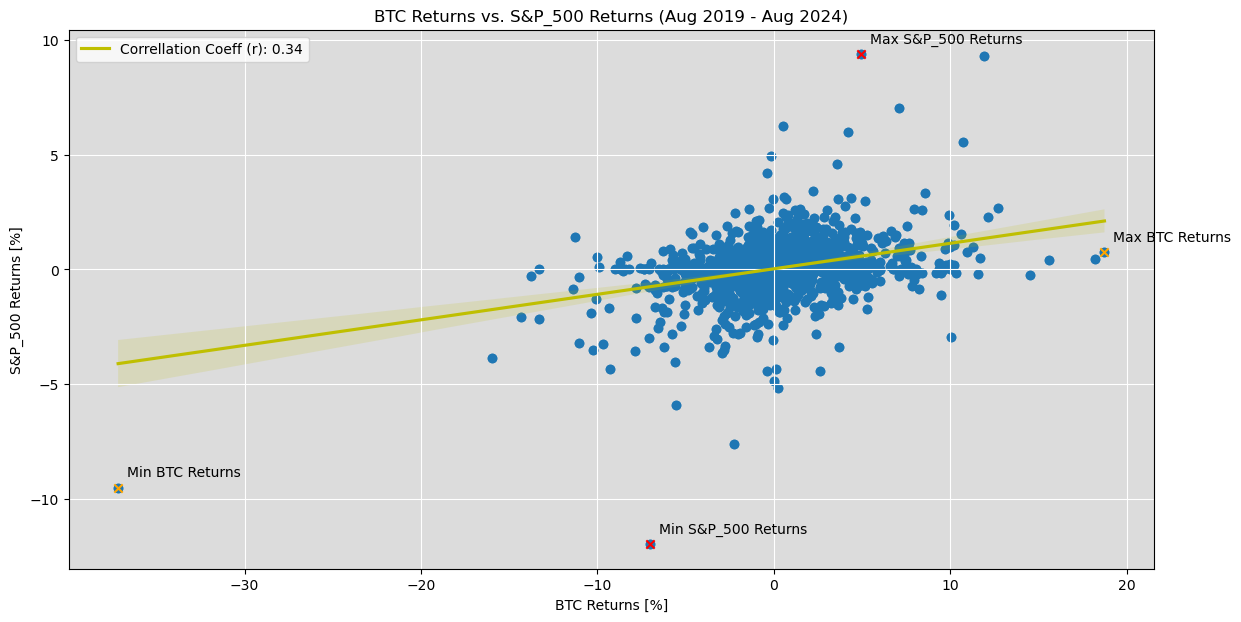

In [38]:
btc_returns = data_tidy.BTC_Return
sp_500_returns = data_tidy.SP_500_Return
title_corr_scatter_plot = 'BTC Returns vs. S&P_500 Returns (Aug 2019 - Aug 2024)'
btc_labels_extrema = ["Max BTC Returns", "Min BTC Returns"]
sp_500_labels_extrema = ["Max S&P_500 Returns", "Min S&P_500 Returns"]

labels = ['BTC Returns [%]', 'S&P_500 Returns [%]']

plot_corr_scatter(btc_returns, btc_labels_extrema, sp_500_returns, sp_500_labels_extrema, labels, title_corr_scatter_plot, btc_sp_500_returns_corr_coeff)

Each point in the plot represents one **Daily Return** value, which we can place on an x- and y-axis by its **BTC_Return** and **SP_500_Return**.

The **correlation coefficient (r)** is also illustrated in our scatterplot. It tells us, in numerical terms, how close the points mapped in the scatterplot come to a linear relationship. **Stronger relationships**, or **bigger r** values, mean relationships where the **points are very close to the line** which we’ve fit to the data.

##### 3. **Interpretion of the Pearson Correlation Coefficient**

1. **Strength of the Relationship**:
    - **0.0 - 0.1**: Negligible correlation.
    - **0.1 - 0.3**: Weak correlation.
    - **0.3 - 0.5**: Moderate correlation.
    - **0.5 - 0.7**: Strong correlation.
    - **0.7 - 1.0**: Very strong correlation.
2. **Direction of the Relationship**:
    - **Positive Correlation**: As one variable increases, the other also increases.
    - **Negative Correlation**: As one variable increases, the other decreases.

In our case is $r = 0.34$, which means there is a **moderate positive correlation** between the **BTC_Returns** and **SP_500_Returns**.

##### 3. Significance of the Correlation

Checking the significance of a correlation involves determining whether the observed correlation between two variables is likely due to random chance or if it reflects a genuine relationship. This is typically done using a **hypothesis test**, where the **null hypothesis** states that there is **no correlation** between the variables.

###### 3.1. **State the Hypotheses**

   - **Null Hypothesis ($H_0$)**: There is no correlation between the variables (i.e., the population correlation coefficient $(\rho = 0)$).
   - **Alternative Hypothesis ($H_1$)**: There is a correlation between the variables (i.e., $(\rho \neq 0)$).

###### 3.2. **Calculation of the P-Value**

The **p-value** tells us the probability of observing the correlation if the *null hypothesis* is true. A **low p-value** indicates that the observed correlation is **unlikely** to have occurred by chance.

In [39]:
corr, p_value = pearsonr(btc_returns, sp_500_returns)
print("Pearson Correlation Coefficient:", corr)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.3386405875940686
P-value: 3.3340513593488817e-50


###### 3.3. **Interpret the P-Value**

   - **Significance Level $(\alpha)$**: Typically, the significance level is set at 0.05 (5%), though this can vary depending on the context.
   - **Decision Rule**:
     - If the p-value ≤ $\alpha$: Reject the null hypothesis ($H_0$), suggesting that the correlation is statistically significant.
     - If the p-value > $\alpha$: Fail to reject the null hypothesis, suggesting that the correlation is not statistically significant.

   **P-Value Interpretation**:
   - Since the current p-value is less than $\alpha$ (0.05), we reject the null hypothesis and conclude that there is a **statistically significant correlation** between the variables.


##### 4. Conclusion

The **Pearson correlation coefficient** between **BTC_Daily_Returns** and **S&P_Daily_Returns** is **0.34**, with a **p-value** of **3.334e-50**. Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a **statistically significant moderate positive correlation** between **BTC_Daily_Returns** and **S&P_Daily_Returns**.


#### 6.1.2. Rolling Correlation over 90-Day Window

A **90-day rolling correlation** is a statistical measure that calculates the correlation between two time series over a moving window of 90 days. This means that for each day in the data series, the correlation between the two time series is calculated using the data from the previous 90 days. The result is a time series of correlation values that shows how the relationship between the two variables changes over time.

##### Why Use Rolling Correlation?

- **Dynamic Relationships**:
    >-  Rolling correlation helps to understand how the relationship between two assets changes over time. For instance, the correlation between Bitcoin and the S&P_500 index may vary due to market conditions, economic events, or changes in investor behavior.

- **Risk Management**:
    >- Investors and analysts use rolling correlations to monitor and manage the risk in a portfolio. By observing how correlations evolve, they can adjust their strategies to maintain desired levels of diversification or hedge against risks.

##### Key Concepts:

- **Rolling Window**:
    >- The rolling window is a fixed period (in this case, 90 days) that "rolls" or moves through the dataset day by day. For each point in time, the correlation is calculated using only the data within the current window.

- **90-Day Window**:
    >- This specific window size means that at each point in time, the correlation is calculated based on the most recent 90 days of data. For example, on January 1st, 2024, the 90-day rolling correlation would be calculated using data from October 3rd, 2023, to January 1st, 2024.

- **Correlation**:
    >- **High Positive Correlation**: If the correlation is close to +1, BTC and S&P_500 have been moving in the same direction over the past 90 days.
    >- **High Negative Correlation**: If the correlation is close to -1, BTC and S&P_500 have been moving in opposite directions.
    >- **Fluctuating Correlation**: The rolling correlation might fluctuate, indicating that the relationship between the two assets is not stable over time.


This approach is particularly useful for analyzing financial markets, where relationships between assets can change due to a wide range of factors.

##### Calculation of the 90-Day Rolling Correlation

The **Rolling Correlation** will show how the correlation between **Bitcoin_Daily_Returns** and the **S&P_500_Daily_Returns** evolves over time. A positive correlation means that the assets tend to move in the same direction, while a negative correlation means they move in opposite directions.


In [40]:
data_tidy.columns

Index(['Date', 'Close_BTC', 'Close_BTC_Filled', 'Close_SP_500',
       'Close_SP_500_Filled', 'BTC_Return', 'SP_500_Return',
       'Normalized_Price_BTC', 'Normalized_Price_SP_500'],
      dtype='object')

In [41]:
data_tidy

,Date,Close_BTC,Close_BTC_Filled,Close_SP_500,Close_SP_500_Filled,BTC_Return,SP_500_Return,Normalized_Price_BTC,Normalized_Price_SP_500
0,2019-08-26,10370.820313,10370.820313,2878.379883,2878.379883,0.000000,0.000000,100.000000,100.000000
1,2019-08-27,10185.500000,10185.500000,2869.159912,2869.159912,-1.786940,-0.320318,98.213060,99.679682
2,2019-08-28,9754.422852,9754.422852,2887.939941,2887.939941,-4.232263,0.654548,94.056425,100.332133
3,2019-08-29,9510.200195,9510.200195,2924.580078,2924.580078,-2.503712,1.268729,91.701523,101.605076
4,2019-08-30,9598.173828,9598.173828,2926.459961,2926.459961,0.925045,0.064279,92.549804,101.670387
...,...,...,...,...,...,...,...,...,...
1820,2024-08-19,59493.453125,59493.453125,5608.250000,5608.250000,1.726094,0.972228,573.661980,194.840508
1821,2024-08-20,59012.792969,59012.792969,5597.120117,5597.120117,-0.807921,-0.198456,569.027244,194.453837
1822,2024-08-21,61175.191406,61175.191406,5620.850098,5620.850098,3.664288,0.423968,589.878038,195.278258
1823,2024-08-22,60381.914063,60381.914063,5570.640137,5570.640137,-1.296730,-0.893281,582.228910,193.533875


In [42]:
# data_tidy["Rolling_Correlation_BTC_SP_500"] = data_tidy.Normalized_Price_BTC.rolling(window=90).corr(data_tidy.Normalized_Price_SP_500)
data_tidy["Rolling_Correlation_BTC_SP_500"] = data_tidy.BTC_Return.rolling(window=90).corr(data_tidy.SP_500_Return)

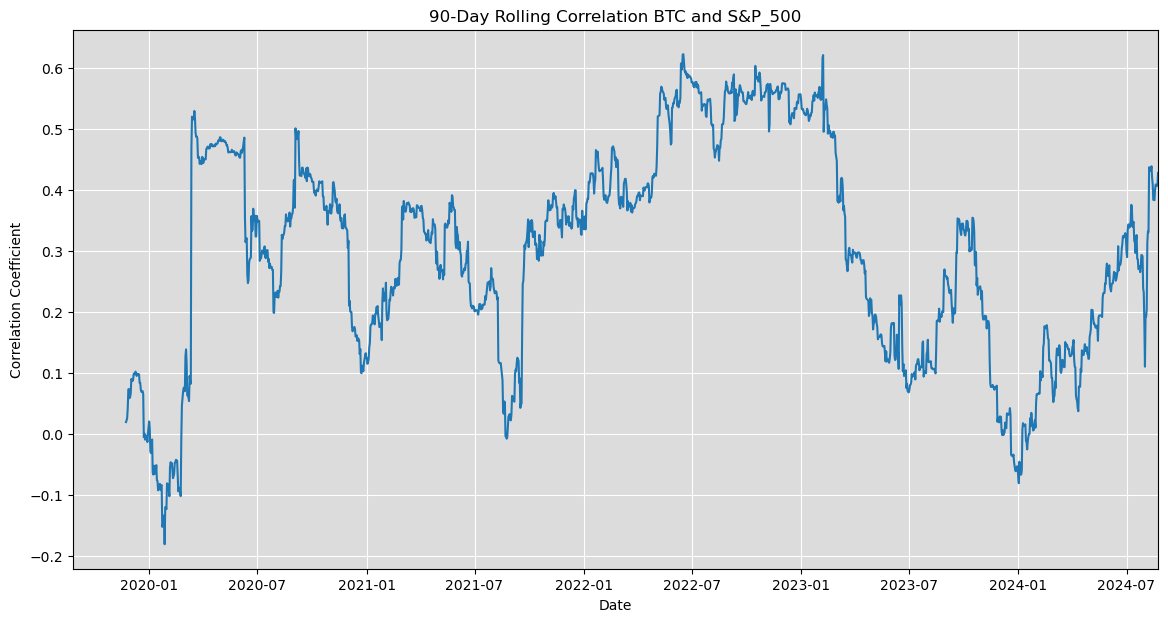

In [43]:
dates = data_tidy.Date
prices_normalized_btc = data_tidy.Rolling_Correlation_BTC_SP_500
title_btc = '90-Day Rolling Correlation BTC and S&P_500'

labels = ['Date', 'Correlation Coefficient']

plot_market_data(dates, prices_normalized_btc, labels, title_btc)

##### Interpretation of the 90-Day Rolling Correlation

The 90-Day Rolling Correlation is **mostly positive**, indicating that *BTC Returns* and *S&P_500 Returns* tend to move in the same direction during this period.
The correlation coefficient typically ranges from **0.1** to **0.6**, indicating a **weak** to **moderate correlation** between the returns.

The Rolling Correlation is **negative** during two periods: the beginning of the **COVID-19 Pandemic**(January 2020 - May 2020) and **late 2023** (December 2023 - January 2024), indicating that stocks and Bitcoin moved in opposite directions.

**Analyzing Correlation in the Context of Major World Events:**
1. **COVID-19 Pandemic (Early 2020):** The onset of the COVID-19 pandemic in early 2020 led to unprecedented market volatility as global economies grappled with lockdowns, supply chain disruptions and uncertainty.Here are some observations:
   - A sharp correlation decline in early 2020 is observed as markets initially reacted to the pandemic.
   - Recovery and subsequent increase in correlations during mid-2020.
2. **Bitcoin Halvings (May 2020 and April 2024):** Bitcoin halvings reduce the reward for mining new blocks, effectively halving the rate at which new bitcoins are generated, which can have significant market implications. Since halvings reduce the supply rate of Bitcoin by half, they are generally considered a favorable event by investors, leading to substantial volatility in the months around halving.

   An interesting pattern is observable in the two halvings recorded in the chart. There is a **sharp uptick** in correlation **within two months after the halving** event. Halving events generate new demand for Bitcoin. The uptick after 2020 halving is very sharp because digital assets fell to COVID considerably in that time. While the uptick is also evident in the latest halving, the effect is much less pronounced, which may be explained by BTC trading near ATH levels in these months.

### 6.2. Volatility Comparison 

Analyze and compare the volatility (standard deviation of returns) of both assets to understand their risk levels.


// **TODO**
Plot the Volatility: Plot the rolling standard deviation (volatility) over time to see how the risk levels of each asset have evolved.

In [44]:
data_tidy.describe()[["BTC_Return", "SP_500_Return"]].T

,count,mean,min,25%,50%,75%,max,std
BTC_Return,1825.0,0.157942,-37.169539,-1.349796,0.018878,1.601855,18.746474,3.378393
SP_500_Return,1825.0,0.043000,-11.984055,-0.191372,0.000000,0.371080,9.382774,1.109802


Get the **mean value** and the **standard deviation** of the **BTC_Return**:

In [45]:
print("Standard Deviation (BTC_Return): ", data_tidy.BTC_Return.std())
print("Mean value (BTC_Return): ", data_tidy.BTC_Return.mean())

Standard Deviation (BTC_Return):  3.3783930961525717
Mean value (BTC_Return):  0.15794150548134925


Get the **mean value** and the **standard deviation** of the **SP_500_Return**:

In [46]:
print("Standard Deviation (SP_500_Return): ", data_tidy.SP_500_Return.std())
print("Mean value (SP_500_Return): ", data_tidy.SP_500_Return.mean())

Standard Deviation (SP_500_Return):  1.1098019425488197
Mean value (SP_500_Return):  0.04300003086596062


#### 6.2.1. Comparing Mean Returns
- **Bitcoin:** The mean return of Bitcoin is significantly higher at 15.79%.
- **S&P 500:** The mean return of the S&P 500 is much lower at 4.30%.

**Interpretation:**
- Bitcoin has a higher mean return, indicating that it offers a potentially higher reward compared to the S&P 500.

#### 6.2.2. Comparing Volatility (Standard Deviation)
- **Bitcoin:** The standard deviation of Bitcoin is 3.3784, indicating high volatility.
- **S&P 500:** The standard deviation of the S&P 500 is 1.1098, indicating much lower volatility compared to Bitcoin.

**Interpretation:**
- **Risk Assessment:** Bitcoin is considerably more volatile than the S&P 500. The higher standard deviation means Bitcoin's returns fluctuate more widely, indicating higher risk.
- **Risk-Reward Tradeoff:** While Bitcoin offers higher potential returns, it comes with significantly greater risk. The S&P 500, on the other hand, has lower returns but is also less risky, making it a more stable investment.

#### 6.2.3. Risk-Adjusted Return Consideration
To assess which asset might be better on a risk-adjusted basis, you could calculate metrics like the Sharpe Ratio, which considers both risk and return. However, based solely on volatility:

- **Bitcoin:** Suited for investors with a high-risk tolerance, seeking higher potential returns despite the greater risk.
- **S&P 500:** Suited for more conservative investors who prefer lower risk and are willing to accept lower returns in exchange for stability. 

#### 6.2.4. Conclusion
Bitcoin is far riskier than the S&P 500 due to its higher standard deviation. Investors should carefully consider their risk tolerance before choosing between these two assets.

If you're making an investment decision, these insights suggest that Bitcoin might offer higher returns but with significantly higher risk. The S&P 500, while safer, offers more modest returns. The choice between the two depends on your investment goals and risk appetite. 

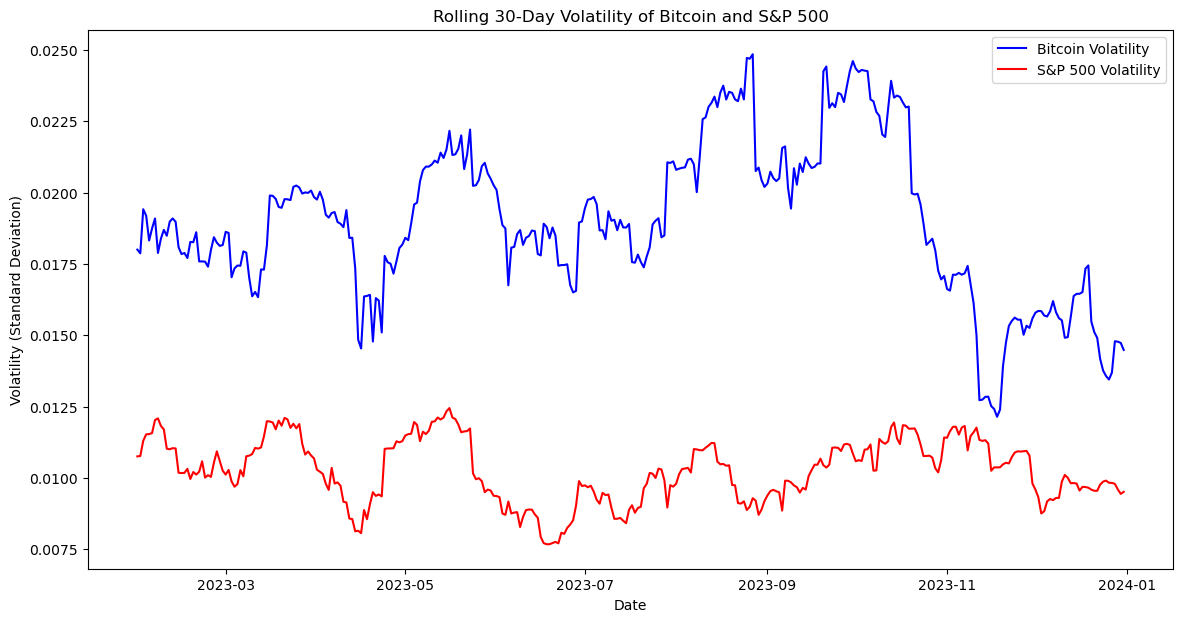

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for Bitcoin and S&P 500 returns
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'Bitcoin_Returns': np.random.normal(0, 0.02, 365),
    'SP500_Returns': np.random.normal(0, 0.01, 365)
}
df = pd.DataFrame(data).set_index('Date')

# Define the rolling window size (e.g., 30 days)
rolling_window = 30

# Calculate rolling standard deviation (volatility)
df['Bitcoin_Volatility'] = df['Bitcoin_Returns'].rolling(window=rolling_window).std()
df['SP500_Volatility'] = df['SP500_Returns'].rolling(window=rolling_window).std()

# Plot the Rolling Volatility
plt.figure(figsize=(14, 7))

# Plot Bitcoin volatility
plt.plot(df.index, df['Bitcoin_Volatility'], label='Bitcoin Volatility', color='blue')

# Plot S&P 500 volatility
plt.plot(df.index, df['SP500_Volatility'], label='S&P 500 Volatility', color='red')

# Add labels and title
plt.title('Rolling 30-Day Volatility of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()

# Display the plot
plt.show()


Sure! I'll guide you step by step on how to plot the rolling standard deviation (volatility) of two assets over time. For this example, let's assume you have the daily returns for Bitcoin and the S&P 500.

### Step 1: Import Necessary Libraries
You'll need Python libraries like `pandas` for data manipulation and `matplotlib` for plotting.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```

### Step 2: Load the Data
Assume you have a DataFrame with daily returns for Bitcoin and the S&P 500.

```python
# Example: Load your data (replace with actual file paths or data source)
# df = pd.read_csv('your_data_file.csv', parse_dates=True, index_col='Date')

# Sample data format (replace this with your actual data)
data = {
    'Date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'Bitcoin_Returns': np.random.normal(0, 0.02, 365),
    'SP500_Returns': np.random.normal(0, 0.01, 365)
}
df = pd.DataFrame(data).set_index('Date')
```

### Step 3: Calculate Rolling Standard Deviation
Choose a rolling window (e.g., 30 days) and calculate the rolling standard deviation for each asset.

```python
# Define the rolling window size (e.g., 30 days)
rolling_window = 30

# Calculate rolling standard deviation (volatility)
df['Bitcoin_Volatility'] = df['Bitcoin_Returns'].rolling(window=rolling_window).std()
df['SP500_Volatility'] = df['SP500_Returns'].rolling(window=rolling_window).std()
```

### Step 4: Plot the Rolling Volatility
Now, plot the rolling standard deviation for both Bitcoin and the S&P 500 on the same chart.

```python
plt.figure(figsize=(14, 7))

# Plot Bitcoin volatility
plt.plot(df.index, df['Bitcoin_Volatility'], label='Bitcoin Volatility', color='blue')

# Plot S&P 500 volatility
plt.plot(df.index, df['SP500_Volatility'], label='S&P 500 Volatility', color='red')

# Add labels and title
plt.title('Rolling 30-Day Volatility of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()

# Display the plot
plt.show()
```

### Step 5: Interpret the Plot
Once the plot is generated, you can observe the following:
- **Volatility Trends:** Look at how the volatility for each asset changes over time.
- **Comparative Analysis:** Compare the volatility levels of Bitcoin and the S&P 500 to see which asset is more volatile during specific periods.

### Example Plot
I'll now generate an example plot using simulated data to illustrate the concept.

Let me execute the code to generate a conceptual plot for you.

Here's the plot showing the rolling 30-day volatility (standard deviation) of Bitcoin and the S&P 500 over a one-year period. 

### Interpretation:
- **Bitcoin Volatility (Blue Line):** The volatility of Bitcoin is generally higher and more variable over time, reflecting its higher risk and price fluctuations.
- **S&P 500 Volatility (Red Line):** The S&P 500 exhibits lower and more stable volatility, indicating less risk and more stable price movements compared to Bitcoin.

This visual comparison clearly demonstrates how much more volatile Bitcoin is relative to the S&P 500.

## 7. Final Thoughts

When making an investment decision, consider that Bitcoin may provide higher returns but comes with greater risk, while the S&P 500 offers more modest returns with less risk. Your choice should align with your investment goals and risk tolerance.

## References

[1] Kejriwal, S. (2024, July 5). Bitcoin and stock market correlation: An empirical study. Coin Bureau. https://coinbureau.com/analysis/bitcoin-and-stock-market-correlation/

[2] Ashford, K. (2024, May 21). What is bitcoin and how does it work? Forbes Advisor. https://www.forbes.com/advisor/investing/cryptocurrency/what-is-bitcoin/

[3] Kenton, W. (2024, June 12). S&P 500 Index: What It’s for and Why It’s Important in Investing. Investopedia. https://www.investopedia.com/terms/s/sp500.asp

[4] Yahoo is part of the Yahoo family of brands. (n.d.-d). https://finance.yahoo.com/quote/GC%3DF/history/?period1=1566763869&period2=1724616667

[5] Yahoo is part of the Yahoo family of brands. (n.d.-c). https://finance.yahoo.com/quote/GC%3DF/history/?period1=1566763767&period2=1724616565

[6] Yahoo is part of the Yahoo family of brands. (n.d.-e). https://finance.yahoo.com/quote/%5EIXIC/history/?period1=1566763946&period2=1724616740

[7] Statistics Solutions. (2024, April 17). Understanding the Correlation Coefficient: A Complete guide. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

## How to compare the cost movement between s&p 500 and bitcoin?

Comparing the cost movement between the S&P 500 and Bitcoin involves analyzing their price changes over time to see how they relate to each other. Here's how you can approach this comparison:

### 1. **Collect Data**
   - **S&P 500**: Obtain historical price data for the S&P 500 index, typically in the form of daily closing prices.
   - **Bitcoin**: Obtain historical price data for Bitcoin, also in daily closing prices.

### 2. **Align Time Periods**
   - Ensure that the data for both assets covers the same time period and is on the same frequency (e.g., daily prices). Align the dates so that each row in your data corresponds to the same day for both the S&P 500 and Bitcoin.

### 3. **Normalize Prices**
   - Since the S&P 500 and Bitcoin have vastly different price levels, it's helpful to normalize their prices. You can do this by converting prices to returns or by indexing both to 100 at the start of your chosen time period.
   - **Returns Calculation**: Calculate the daily return for each asset as:
     \[
     \text{Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}}
     \]
   - **Indexing**: Set the initial price of both assets to 100 and then calculate the subsequent prices based on their daily returns.

### 4. **Visualize the Data**
   - **Line Chart**: Plot the normalized prices or returns over time on the same chart to visually compare their movements.
   - **Scatter Plot**: Plot the returns of Bitcoin against the returns of the S&P 500 to see if there's any correlation.

### 5. **Statistical Analysis**
   - **Correlation**: Calculate the Pearson correlation coefficient between the daily returns of the S&P 500 and Bitcoin. This will give you a measure of the linear relationship between the two assets. A correlation close to 1 means they move together, while a correlation close to -1 means they move in opposite directions.
   - **Volatility Comparison**: Analyze and compare the volatility (standard deviation of returns) of both assets to understand their risk levels.
   - **Beta**: Calculate Bitcoin's beta with respect to the S&P 500 to see how sensitive Bitcoin is to movements in the S&P 500.

### 6. **Interpret the Results**
   - **Correlation Interpretation**: If the correlation is high, it indicates that Bitcoin and the S&P 500 have been moving similarly. A low or negative correlation suggests they move independently or inversely.
   - **Risk Comparison**: Higher volatility in Bitcoin might indicate higher risk compared to the S&P 500.
   - **Trends and Patterns**: Look for periods where the relationship between the two assets changes, such as during market crashes or bull runs.

### 7. **Advanced Techniques (Optional)**
   - **Rolling Correlation**: Calculate the correlation over a rolling window (e.g., 30 days) to see how the relationship between Bitcoin and the S&P 500 evolves over time.
   - **Cointegration Analysis**: If you're interested in the long-term relationship, you could perform a cointegration test to see if there's a stable, long-term equilibrium between the two.

By following these steps, you'll be able to compare the cost movement between the S&P 500 and Bitcoin, providing insights into how these two different assets interact with each other in the financial markets.